In [1]:
DF_PATH = '../data/processed/2_descanalystics_df.pkl'
ROLE_COL = ['DevType']
TECH_COL = ['LanguageHaveWorkedWith', 
            'DatabaseHaveWorkedWith', 
            'MiscTechHaveWorkedWith', 
            'ToolsTechHaveWorkedWith']
OTHER_COL = ['PlatformHaveWorkedWith',
             'WebframeHaveWorkedWith', 
             'EmbeddedHaveWorkedWith',
             'NEWCollabToolsHaveWorkedWith']

EXPORT_FEATURES_DIR = "../data/processed/"

In [2]:
# Load packages
import pandas as pd 
import numpy as np
import logging
import pickle
import os
import yaml

import plotly 
import plotly.graph_objects as go
import plotly.express as px

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.manifold import TSNE

from sklearn.pipeline import make_pipeline
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split

from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import silhouette_score

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
df = pd.read_pickle(DF_PATH)

In [5]:
df.sample()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,AgeGroup
40415,40416,I am a developer by profession,30.0,"[Employed, full-time, Student, part-time]",In-person,Apples,"[Hobby, School or academic work, Professional ...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","[Books / Physical media, Colleague, On the job...","[Technical documentation, Blogs, Books, Social...","[API document(s) and/or SDK document(s), User ...",7.0,5.0,"Developer, embedded applications or devices",20 to 99 employees,I have some influence,[Ask developers I know/work with],Is set up to be customized and needs to be eng...,"[APIs, Reputation for quality and excellence]",United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,48000.0,"[Bash/Shell (all shells), C, Lua, Python]","[Ada, Bash/Shell (all shells), C, Lua, MicroPy...","[Bash/Shell (all shells), C, Lua, Python]",[],[],[],[],[],[],[Flask],[Flask],[Flask],"[GNU GCC, Rasberry Pi]","[GNU GCC, Rasberry Pi]","[GNU GCC, Rasberry Pi]","[Keras, Ruff]",[Ruff],[Ruff],"[Docker, Make, Nix, Pip]","[Docker, Make, Pip]","[Docker, Make, Pip]","[Neovim, Vim]",[Neovim],[Neovim],"[Android, Arch, Windows, Windows Subsystem for...","[Ubuntu, Windows]","[Doxygen, Jira, Markdown File, Obsidian, Wikis]","[Doxygen, Jira, Markdown File, Wikis]","[Doxygen, Jira, Markdown File, Wikis]","[Discord, Microsoft Teams, Rocketchat, Whatsapp]","[Discord, Matrix, Signal, Slack, Whatsapp]","[Discord, Whatsapp]","[ChatGPT, GitHub Copilot]",[ChatGPT],[ChatGPT],"[Stack Overflow, Stack Exchange]",Daily or almost daily,No,NaN,[Finding reliable guidance from community-vett...,"No, not at all",Yes,Unfavorable,[Speed up learning],Highly distrust,Bad at handling complex tasks,"[Debugging and getting help, Search for answers]",[Learning about a codebase],"[Project planning, Writing code, Documenting c...",[],"[Debugging and getting help, Search for answers]",[],[],[],No,"[Circulating misinformation or disinformation,...","[Don’t trust the output or answers, AI tools l...",Yes,Individual contributor,5.0,Strongly agree,Agree,Disagree,Disagree,Agree,Strongly agree,Strongly agree,Disagree,Disagree,1-2 times a week,10+ times a week,10+ times a week,60-120 minutes a day,60-120 minutes a day,"[Amount of technical

In [6]:
df[TECH_COL].isnull().sum()

LanguageHaveWorkedWith     0
DatabaseHaveWorkedWith     0
MiscTechHaveWorkedWith     0
ToolsTechHaveWorkedWith    0
dtype: int64

In [7]:
df_dev = pd.get_dummies(df['DevType']).astype('int')

In [8]:
encoded_dfs = {}
for col in TECH_COL:
    # Fill NaN values with empty list
    df[col] = df[col].fillna('[]')
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(df[col]),
                            columns=binarizer.classes_,
                            index=df[col].index)
    encoded_dfs[col] = encoded_df

In [9]:
df_mod = pd.concat(encoded_dfs, axis=1)

In [10]:
# Create MultiIndex columns for df_dev with ROLE_COL category
df_dev.columns = pd.MultiIndex.from_product([ROLE_COL, df_dev.columns])

# Concatenate df_dev with df horizontally
df_mod = pd.concat([df_mod, df_dev], axis=1)

In [11]:
df_mod.sample()

LanguageHaveWorkedWith                                                  \
                        Ada Apex Assembly Bash/Shell (all shells)  C C# C++   
7064                      0    0        0                       0  0  0   0   

                                                                             \
     Clojure Cobol Crystal Dart Delphi Elixir Erlang F# Fortran GDScript Go   
7064       0     0       0    0      0      0      0  0       0        0  0   

                                                                           \
     Groovy HTML/CSS Haskell Java JavaScript Julia Kotlin Lisp Lua MATLAB   
7064      0        1       0    0          1     0      0    0   0      0   

                                                                             \
     MicroPython Nim OCaml Objective-C PHP Perl PowerShell Prolog Python  R   
7064           0   0     0           0   0    0          0      0      0  0   

                                                                            \
     Ruby Rust SQL Scala Solidity Swift TypeScript VBA Visual Basic (.Net)   
7064    0    0   0     0        0     0          1   0                   0   

                DatabaseHaveWorkedWith                                       \
     Zephyr Zig               BigQuery Cassandra Clickhouse Cloud Firestore   
7064      0   0                      0         0          0               1   

                                                                             \
     Cockroachdb Cosmos DB Couch DB Couchbase Databricks SQL Datomic DuckDB   
7064           0         0        0         0              0       0      0   

                                                                              \
     Dynamodb Elasticsearch EventStoreDB Firebase Realtime Database Firebird   
7064        0             0            0                          1        0   

                                                                        \
     H2 IBM DB2 InfluxDB MariaDB Microsoft Access Microsoft SQL Server   
7064  0       0        0       0                0                    0   

                                                                        \
     MongoDB MySQL Neo4J Oracle PostgreSQL Presto RavenDB Redis SQLite   
7064       1     0     0      0          0      0       0     0      0   

                                  MiscTechHaveWorkedWith  \
     Snowflake Solr Supabase TiDB             .NET (5+)    
7064         0    0        0    0                      0   

                                                                          \
     .NET Framework (1.0 - 4.8) .NET MAUI Apache Kafka Apache Spark CUDA   
7064                          0         0            0            0    0   

                                                            \
     Capacitor Cordova DirectX Electron Flutter GTK Hadoop   
7064         0       0       0        0       0   0      0   

                                                                             \
     Hugging Face Transformers Ionic JAX Keras Ktor MFC NumPy OpenCL OpenGL   
7064                         0     0   0     0    0   0     0      0      0   

                                                                              \
     Opencv Pandas Qt Quarkus RabbitMQ React Native Roslyn Ruff Scikit-Learn   
7064      0      0  0       0        0            0      0    0            0   

                                                                        \
     Spring Framework SwiftUI Tauri TensorFlow Tidyverse Torch/PyTorch   
7064                0       0     0          0         0             0   

                    ToolsTechHaveWorkedWith                                  \
     Xamarin mlflow                     APT Ansible Ant Bun Chef Chocolatey   
7064       0      0                       0       0   0   0    0          0   

                                                                          \
     Composer Dagger Docker Godot Google Test Gr

# Dimentionality Reduction

In [12]:
# Prepare sub data frames 
skills_ohe = df_mod.drop('DevType', axis=1).copy()
std_skills = StandardScaler().fit_transform(skills_ohe)

C:\Users\Yossef\AppData\Local\Temp\ipykernel_43512\645334806.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  skills_ohe = df_mod.drop('DevType', axis=1).copy()


In [13]:
tsne_projection = TSNE(n_components=2, 
                       perplexity=10,
                       learning_rate=0.005,
                       init='pca', 
                       method='barnes_hut', 
                       n_jobs=2, 
                       n_iter=10**10,
                       random_state=42).fit_transform(std_skills.T)

tsne_projection = pd.DataFrame(tsne_projection, index=skills_ohe.columns)

In [14]:
tsne_projection.shape

(157, 2)

In [15]:
fig = px.scatter(x=tsne_projection[0], y=tsne_projection[1], text=tsne_projection.droplevel(0).index)
fig.update_traces(textposition='top center')
fig.update_layout(height=1000, width=1000, title_text='TSNE')
fig.show()

# Cluster

In [16]:
range_n_cluster = list(range(10,34))
silhoutte_score = []
best_cluster_model = None 

for n_clusters in range_n_cluster:
    cluster_model  = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = cluster_model.fit_predict(tsne_projection)
    
    silhouette_avg = silhouette_score(tsne_projection, cluster_labels)
    silhoutte_score += [silhouette_avg]
    
    if silhouette_avg >= np.max(silhoutte_score):
        best_cluster_model = cluster_model

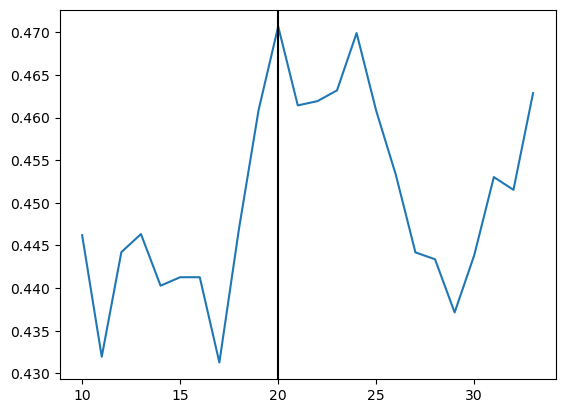

In [17]:
plt.plot(range_n_cluster, silhoutte_score)
plt.axvline(best_cluster_model.n_clusters, color='black')

In [20]:
cluster_labels = ["skills_group_" + str(label) 
                 for label in best_cluster_model.labels_]

In [21]:
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.droplevel(0).index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=1200, title_text='Cluster')
fig.show()

In [22]:
skills_clusters = tsne_projection.index.droplevel(0).to_series().groupby(cluster_labels).apply(list)

In [23]:
for cluster, skills in skills_clusters.items():
    print(cluster)
    print(skills)

skills_group_0
['Groovy', 'Java', 'Kotlin', 'H2', 'Oracle', 'Ktor', 'Quarkus', 'Spring Framework', 'Ant', 'Dagger', 'Gradle', 'Maven (build tool)']
skills_group_1
['Scala', 'Cassandra', 'Databricks SQL', 'Neo4J', 'Snowflake', 'Apache Kafka', 'Apache Spark', 'Hadoop']
skills_group_10
['PHP', 'SQL', 'MariaDB', 'MySQL', 'SQLite', 'Composer']
skills_group_11
['Delphi', 'VBA', 'Visual Basic (.Net)', 'Firebird', 'Microsoft Access']
skills_group_12
['CUDA', 'Hugging Face Transformers', 'JAX', 'Keras', 'NumPy', 'Opencv', 'Pandas', 'Scikit-Learn', 'TensorFlow', 'Torch/PyTorch', 'mlflow']
skills_group_13
['Cobol', 'Fortran', 'Julia', 'Perl', 'IBM DB2']
skills_group_14
['Clickhouse', 'Cockroachdb', 'Couch DB', 'Couchbase', 'EventStoreDB', 'Presto', 'RavenDB', 'Solr', 'TiDB']
skills_group_15
['Assembly', 'C', 'C++', 'MATLAB', 'GTK', 'Qt', 'Google Test', 'Ninja']
skills_group_16
['Go', 'Ruby', 'Elasticsearch', 'PostgreSQL', 'Redis', 'RabbitMQ', 'Docker', 'Homebrew']
skills_group_17
['Capacitor', 'C

# Create new features

In [31]:
skills_clusters

skills_group_0     [Groovy, Java, Kotlin, H2, Oracle, Ktor, Quark...
skills_group_1     [Scala, Cassandra, Databricks SQL, Neo4J, Snow...
skills_group_10         [PHP, SQL, MariaDB, MySQL, SQLite, Composer]
skills_group_11    [Delphi, VBA, Visual Basic (.Net), Firebird, M...
skills_group_12    [CUDA, Hugging Face Transformers, JAX, Keras, ...
skills_group_13               [Cobol, Fortran, Julia, Perl, IBM DB2]
skills_group_14    [Clickhouse, Cockroachdb, Couch DB, Couchbase,...
skills_group_15    [Assembly, C, C++, MATLAB, GTK, Qt, Google Tes...
skills_group_16    [Go, Ruby, Elasticsearch, PostgreSQL, Redis, R...
skills_group_17                          [Capacitor, Cordova, Ionic]
skills_group_18                               [R, DuckDB, Tidyverse]
skills_group_19                                   [Rust, Tauri, Nix]
skills_group_2     [HTML/CSS, JavaScript, TypeScript, MongoDB, Su...
skills_group_3     [GDScript, DirectX, MFC, OpenCL, OpenGL, Godot...
skills_group_4     [Dart, Objectiv

In [32]:
new_features = []

for cluster, skills in skills_clusters.items():
    cluster_sum = skills_ohe.droplevel(0, axis=1)[skills].sum(axis=1)
    cluster_sum.name = cluster
    new_features.append(cluster_sum)

fe_clustered_skills = pd.concat(new_features, axis=1)

In [33]:
fe_clustered_skills

,skills_group_0,skills_group_1,skills_group_10,skills_group_11,skills_group_12,skills_group_13,skills_group_14,skills_group_15,skills_group_16,skills_group_17,skills_group_18,skills_group_19,skills_group_2,skills_group_3,skills_group_4,skills_group_5,skills_group_6,skills_group_7,skills_group_8,skills_group_9
1,1,0,0,0,0,0,0,0,4,0,0,0,7,0,0,2,0,0,2,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,2,0,0,0,6,0,0,0,0,0,0,0
11,1,0,2,4,0,0,0,2,3,0,0,0,6,0,0,0,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65428,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65431,6,0,3,1,0,0,1,2,3,1,0,0,5,0,2,1,7,0,2,0
65432,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65434,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Illustration Model


Create train / test matrices

In [34]:
combined_features_df = pd.concat([fe_clustered_skills, 
                                  skills_ohe.droplevel(0,axis=1)], 
                                 axis=1)
roles_df = df_dev['DevType'].copy()

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(combined_features_df, roles_df, test_size=0.2, random_state=0)

# Compute samples weight to deal with classes imbalance

In [44]:
# Assign class weight as an inverse of its frequency 
class_weights = (1 / roles_df.sum(axis=0))
class_weights

Academic researcher                              0.001002
Blockchain                                       0.005236
Cloud infrastructure engineer                    0.001721
Data engineer                                    0.000956
Data or business analyst                         0.002558
Data scientist or machine learning specialist    0.001111
Database administrator                           0.007812
Designer                                         0.010000
DevOps specialist                                0.001064
Developer Advocate                               0.011364
Developer Experience                             0.005236
Developer, AI                                    0.002188
Developer, QA or test                            0.002252
Developer, back-end                              0.000108
Developer, desktop or enterprise applications    0.000442
Developer, embedded applications or devices      0.000672
Developer, front-end                             0.000341
Developer, ful

In [50]:
class_weights.values

array([1.00200401e-03, 5.23560209e-03, 1.72117040e-03, 9.56022945e-04,
       2.55754476e-03, 1.11111111e-03, 7.81250000e-03, 1.00000000e-02,
       1.06382979e-03, 1.13636364e-02, 5.23560209e-03, 2.18818381e-03,
       2.25225225e-03, 1.07968041e-04, 4.41696113e-04, 6.71591672e-04,
       3.40831629e-04, 5.95450756e-05, 1.96850394e-03, 5.51267916e-04,
       4.31034483e-03, 3.61010830e-03, 9.14076782e-04, 6.41025641e-03,
       2.43902439e-02, 6.88231246e-04, 4.95049505e-03, 3.59712230e-03,
       1.18906064e-03, 3.55871886e-03, 3.71747212e-03, 1.43061516e-03,
       1.30039012e-03, 2.61096606e-03])

In [51]:
Y_train.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
# Multiply class weights with the 1 hot encoded values and get the mean of each sample
sample_weight = np.multiply(class_weights.values, Y_train.values).sum(axis=1)
sample_weight

array([3.71747212e-03, 5.95450756e-05, 5.95450756e-05, ...,
       5.51267916e-04, 1.07968041e-04, 5.95450756e-05])

# Compute samples weight to deal with classes imbalance

In [54]:
def f1_from_confusion_matrix(confusion_matrix):
    """
    Calculate F1 score from confusion matrix components
    
    Matrix format:
    [[TN, FP],
     [FN, TP]]
    
    Components:
    - TP = confusion_matrix[1,1]  # True Positives
    - FP = confusion_matrix[0,1]  # False Positives
    - FN = confusion_matrix[1,0]  # False Negatives
    """
    true_positives = confusion_matrix[1,1]
    false_positives = confusion_matrix[0,1]
    false_negatives = confusion_matrix[1,0]
    
    return (true_positives / 
            (true_positives + (0.5 * (false_positives + false_negatives))))

In [55]:
feature_sets = {'original': skills_ohe.droplevel(0,axis=1).columns.tolist(), 
                'clusters': fe_clustered_skills.columns.tolist()}

In [61]:
feature_sets.items()

dict_items([('original', ['Ada', 'Apex', 'Assembly', 'Bash/Shell (all shells)', 'C', 'C#', 'C++', 'Clojure', 'Cobol', 'Crystal', 'Dart', 'Delphi', 'Elixir', 'Erlang', 'F#', 'Fortran', 'GDScript', 'Go', 'Groovy', 'HTML/CSS', 'Haskell', 'Java', 'JavaScript', 'Julia', 'Kotlin', 'Lisp', 'Lua', 'MATLAB', 'MicroPython', 'Nim', 'OCaml', 'Objective-C', 'PHP', 'Perl', 'PowerShell', 'Prolog', 'Python', 'R', 'Ruby', 'Rust', 'SQL', 'Scala', 'Solidity', 'Swift', 'TypeScript', 'VBA', 'Visual Basic (.Net)', 'Zephyr', 'Zig', 'BigQuery', 'Cassandra', 'Clickhouse', 'Cloud Firestore', 'Cockroachdb', 'Cosmos DB', 'Couch DB', 'Couchbase', 'Databricks SQL', 'Datomic', 'DuckDB', 'Dynamodb', 'Elasticsearch', 'EventStoreDB', 'Firebase Realtime Database', 'Firebird', 'H2', 'IBM DB2', 'InfluxDB', 'MariaDB', 'Microsoft Access', 'Microsoft SQL Server', 'MongoDB', 'MySQL', 'Neo4J', 'Oracle', 'PostgreSQL', 'Presto', 'RavenDB', 'Redis', 'SQLite', 'Snowflake', 'Solr', 'Supabase', 'TiDB', '.NET (5+) ', '.NET Framework 

In [64]:
def train_and_evaluate_model(X_train, X_test, Y_train, Y_test, sample_weight):
    """Train model and get F1 scores for train/test sets"""
    # Train model
    clf = MultiOutputClassifier(LogisticRegression(max_iter=1000))
    clf.fit(X_train, Y_train, sample_weight=sample_weight)
    
    # Get predictions
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    
    # Calculate F1 scores
    train_matrices = multilabel_confusion_matrix(Y_train, train_pred)
    test_matrices = multilabel_confusion_matrix(Y_test, test_pred)
    
    return ([f1_from_confusion_matrix(m) for m in train_matrices],
            [f1_from_confusion_matrix(m) for m in test_matrices])


In [65]:
def evaluate_feature_sets(feature_sets, X_train, X_test, Y_train, Y_test, sample_weight):
    """Evaluate multiple feature sets"""
    results = {}
    
    for name, features in feature_sets.items():
        try:
            # Get data subset
            X_train_sub = X_train[features].copy()
            X_test_sub = X_test[features].copy()
            
            # Get scores
            train_scores, test_scores = train_and_evaluate_model(
                X_train_sub, X_test_sub, Y_train, Y_test, sample_weight
            )
            
            # Store results
            results[name] = pd.DataFrame({
                "train": train_scores,
                "test": test_scores
            }, index=roles_df.columns)
            
            # Print summary
            print(f"{name}:")
            print(f"Train F1: {np.mean(train_scores):.4f}")
            print(f"Test F1:  {np.mean(test_scores):.4f}\n")
            
        except Exception as e:
            print(f"Error in {name}: {e}\n")
            
    return results

In [66]:
results = evaluate_feature_sets(feature_sets, X_train, X_test, Y_train, Y_test, sample_weight)

original:
Train F1: 0.0000
Test F1:  0.0000

clusters:
Train F1: 0.0049
Test F1:  0.0059



In [67]:
fe_clustered_skills

,skills_group_0,skills_group_1,skills_group_10,skills_group_11,skills_group_12,skills_group_13,skills_group_14,skills_group_15,skills_group_16,skills_group_17,skills_group_18,skills_group_19,skills_group_2,skills_group_3,skills_group_4,skills_group_5,skills_group_6,skills_group_7,skills_group_8,skills_group_9
1,1,0,0,0,0,0,0,0,4,0,0,0,7,0,0,2,0,0,2,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,2,0,0,0,6,0,0,0,0,0,0,0
11,1,0,2,4,0,0,0,2,3,0,0,0,6,0,0,0,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65428,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65431,6,0,3,1,0,0,1,2,3,1,0,0,5,0,2,1,7,0,2,0
65432,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65434,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
features_path = os.path.join(EXPORT_FEATURES_DIR, "features_skills_clusters.pkl")
fe_clustered_skills.to_pickle(features_path)

In [69]:
description_path = os.path.join(EXPORT_FEATURES_DIR, "features_skills_clusters_description.yaml")
with open(description_path, 'w') as outfile:
    yaml.dump(skills_clusters.to_dict(), outfile)